In [166]:
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

#from sklearn import metrics
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [2]:
df = pd.read_csv('http://bit.ly/boston_housing_csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df_strong_features = df[['crim','rm','age','lstat','medv']]

In [7]:
df_strong_features.head()

,crim,rm,age,lstat,medv
0,0.00632,6.575,65.2,4.98,24.0
1,0.02731,6.421,78.9,9.14,21.6
2,0.02729,7.185,61.1,4.03,34.7
3,0.03237,6.998,45.8,2.94,33.4
4,0.06905,7.147,54.2,5.33,36.2


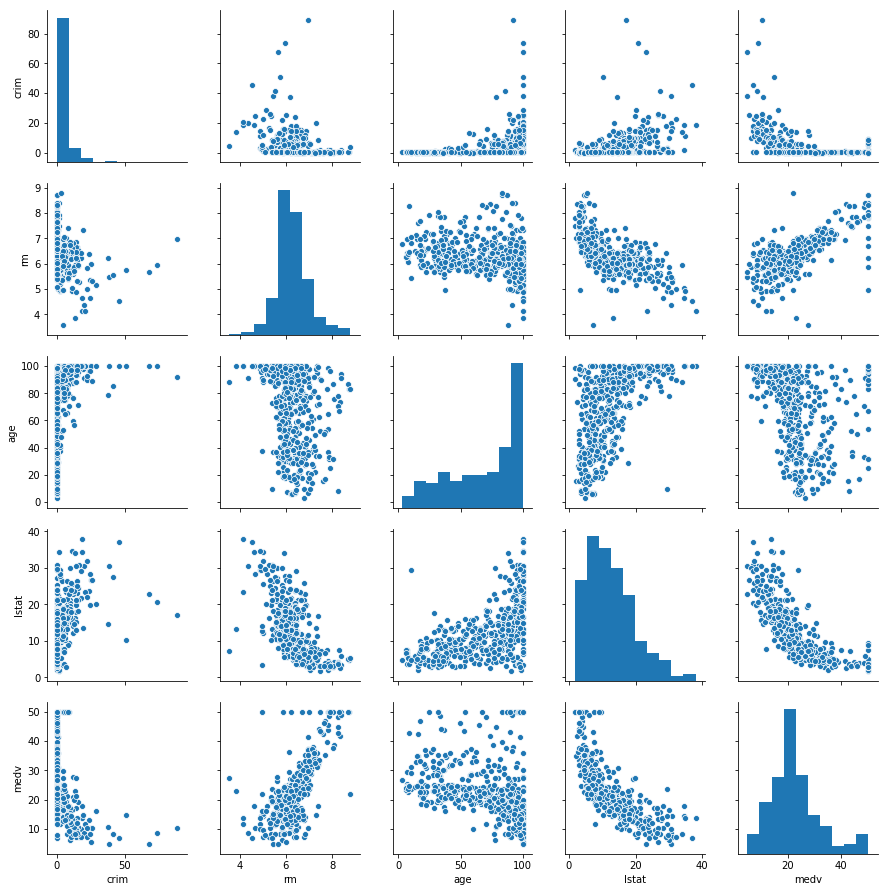

In [8]:
sns.pairplot(df_strong_features)

In [9]:
df_strong_features.corr()

,crim,rm,age,lstat,medv
crim,1.000000,-0.219247,0.352734,0.455621,-0.388305
rm,-0.219247,1.000000,-0.240265,-0.613808,0.695360
age,0.352734,-0.240265,1.000000,0.602339,-0.376955
lstat,0.455621,-0.613808,0.602339,1.000000,-0.737663
medv,-0.388305,0.695360,-0.376955,-0.737663,1.000000


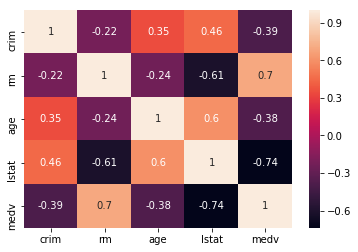

In [10]:
sns.heatmap(df_strong_features.corr(), 
            xticklabels=df_strong_features.corr().columns, 
            yticklabels=df_strong_features.corr().columns,
            annot=True)

In [11]:
X = df[['lstat']]
y = df[['medv']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train.head()

,lstat
11,13.27
196,4.08
76,11.97
343,7.18
190,5.10


In [25]:
X_test.head()

,lstat
179,5.04
490,29.68
137,14.59
500,14.33
64,8.05


In [23]:
y_train.head()

,medv
11,18.9
196,33.3
76,20.0
343,23.9
190,37.0


In [26]:
y_test.head()

,medv
179,37.2
490,8.1
137,17.1
500,16.8
64,33.0


In [18]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
predictions = model.predict(X_test)
predictions

array([[29.29840095],
       [ 7.19998704],
       [20.73347186],
       [20.96665317],
       [26.5988788 ],
       [27.91725008],
       [24.49127844],
       [18.80524175],
       [29.07418815],
       [15.80975869],
       [22.82313519],
       [28.76029022],
       [17.86354797],
       [23.61236425],
       [28.05177776],
       [30.61677223],
       [ 7.76500331],
       [19.52272272],
       [30.10556704],
       [26.55403624],
       [27.92621859],
       [18.3299106 ],
       [14.78734831],
       [25.80964973],
       [22.69757602],
       [13.98915073],
       [30.40152794],
       [16.95772825],
       [ 9.76498151],
       [19.15501372],
       [12.22235384],
       [22.12359124],
       [22.93075733],
       [29.36118054],
       [18.38372168],
       [28.98450303],
       [24.06078986],
       [25.21772793],
       [25.3432871 ],
       [25.28050751],
       [26.50022516],
       [17.91735905],
       [26.83206011],
       [29.57642483],
       [29.66610995],
       [30

In [50]:
# R-squared
model.score(X_train, y_train)

0.5407122900548623

In [35]:
rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

6.799056053607534

In [36]:
model.coef_

array([[-0.89685121]])

As the lstat increases by 1, MEDV decreases by .89

In [37]:
model.intercept_

array([33.81853107])

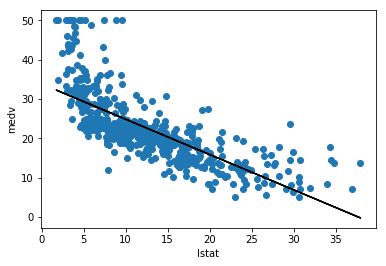

In [49]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='k')
plt.xlabel('lstat')
plt.ylabel('medv')

plt.show()

# rm

In [65]:
X = df[['rm']]
y = df[['medv']]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [70]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
predictions = model.predict(X_test)
predictions

array([[21.68459196],
       [20.56004787],
       [21.93552329],
       [24.54706782],
       [28.87795662],
       [20.94109174],
       [21.96340454],
       [23.42252373],
       [31.64749495],
       [26.57310593],
       [23.26452994],
       [23.84074261],
       [21.12696679],
       [25.61584939],
       [22.40021093],
       [31.58243869],
       [14.13806469],
       [25.66231816],
       [15.81094019],
       [17.30723439],
       [19.6492601 ],
       [15.34625256],
       [19.1381037 ],
       [18.6641223 ],
       [21.15484805],
       [26.96344355],
       [15.8295277 ],
       [32.00995131],
       [19.48197255],
       [23.8035676 ],
       [14.26817723],
       [23.57122378],
       [24.27754899],
       [26.4801684 ],
       [34.77019589],
       [18.59906603],
       [16.06187152],
       [23.62698629],
       [22.05634207],
       [24.97458045],
       [36.72188398],
       [24.60283034],
       [24.57494908],
       [16.12692779],
       [27.4838937 ],
       [30

In [72]:
# R-squared
model.score(X_train, y_train)

0.5125349681394578

In [73]:
rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

6.698478360158572

In [74]:
model.coef_

array([[9.29375279]])

As rm increases by 1, increases decreases by 9.29

In [75]:
model.intercept_

array([-35.95526286])

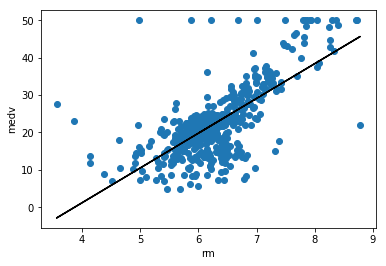

In [77]:
plt.scatter(X, y)
# k = black
plt.plot(X, model.predict(X), color='k')
plt.xlabel('rm')
plt.ylabel('medv')

plt.show()

# Multiple Linear Regression

In [191]:
X = df[['rm','lstat']]
y = df['medv']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [193]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [194]:
predictions = model.predict(X_test)
predictions

array([25.50510964, 30.8592405 , 17.42725985, 25.81325491, 19.64929972,
       22.90317032, 16.88571841, 14.61917747, 22.06066668, 20.03326882,
       17.34725148, 18.15555053, -2.53419257, 22.41228621, 19.92807359,
       26.93027912, 17.16881388,  3.46139894, 37.31795503, 18.49325989,
       26.09287374, 27.0359285 , 13.08646469, 26.07395803, 19.05197872,
       14.34439003, 22.50507619, 21.09395936, 17.80756143, 18.90537548,
       17.3189494 , 26.72355799, 27.62430957, 19.01752219, 15.4809415 ,
       17.37191951, 32.8765884 , 22.03500171, 20.02675295, 25.5193256 ,
       12.24468569, 28.82657024, 38.2438306 , 18.45117927, 25.65604941,
       16.5588818 , 15.7090024 , 26.97797141, 19.55868547, 28.94200451,
       20.60534552, 31.33646277, 17.88508649, 28.36639373, 34.9844153 ,
       23.96269158, 19.65312104, 31.54864539, 24.99070281, 15.11477808,
       27.10508448, 32.73300584, 29.58795549, 18.58249363, 28.64129064,
       10.75991895, 20.69510169, 26.34948505, 29.46875554, 16.79

In [195]:
# Root mean squared error
rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

5.589569804715174

In [196]:
pd.DataFrame([model.coef_], columns = X.columns, index=['Coef']).T

,Coef
rm,5.465099
lstat,-0.632499


In [197]:
model.intercept_

-3.841177079004872

In [198]:
r2 = model.score(X_train,y_train)
r2

0.6501592679428922

### Adjusted R-squared
![](https://i.stack.imgur.com/fLrDw.png)

n = # of observations  
p = # of independent variables

The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance

In [199]:
# shape returns # of rows and columns in a dataframe
X_train.shape

(404, 2)

In [200]:
n = X_train.shape[0]
n

404

In [201]:
p = X_train.shape[1]
p

2

In [202]:
# R-squared
r2 = model.score(X_train, y_train)
r2

0.6501592679428922

In [203]:
# adjusted R-squared
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p -1)
adj_r2

0.6484144263864977

# statsmodels


In [204]:
X = df[['rm','lstat']]
y = df['medv']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
# manually add intercept
X_train = sm.add_constant(X_train)
X_train

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


,const,rm,lstat
477,1.0,5.304,24.91
15,1.0,5.834,8.47
332,1.0,6.031,7.83
423,1.0,6.103,23.29
19,1.0,5.727,11.28
325,1.0,6.431,5.08
335,1.0,6.037,8.01
56,1.0,6.383,5.77
437,1.0,6.152,26.45
409,1.0,6.852,19.78


In [207]:
model = sm.OLS(y_train, X_train).fit()

In [208]:
X_test = sm.add_constant(X_test)
predictions = model.predict(X_test)
predictions

173    25.505110
274    30.859241
491    17.427260
72     25.813255
452    19.649300
76     22.903170
316    16.885718
140    14.619177
471    22.060667
500    20.033269
218    17.347251
9      18.155551
414    -2.534193
78     22.412286
323    19.928074
473    26.930279
124    17.168814
388     3.461399
195    37.317955
448    18.493260
271    26.092874
278    27.035929
30     13.086465
501    26.073958
421    19.051979
474    14.344390
79     22.505076
454    21.093959
210    17.807561
497    18.905375
         ...    
444    13.104370
355    25.076632
77     23.218769
398     6.611875
104    22.063380
203    36.666424
381    18.594825
489    10.585877
69     22.761267
408    10.158321
255    22.421132
392     7.438497
312    21.662230
234    27.825464
460    22.394823
324    27.346540
93     26.174735
137    22.202416
176    22.664157
417     8.295945
131    22.976605
346    20.378219
365    11.116650
132    23.949048
371    24.102166
412    -0.287676
436    20.052227
411    19.1183

In [209]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     372.6
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           3.52e-92
Time:                        19:52:18   Log-Likelihood:                -1262.9
No. Observations:                 404   AIC:                             2532.
Df Residuals:                     401   BIC:                             2544.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8412      3.523     -1.090      0.276     -10.767       3.085
rm             5.4651      0.492     11.118      0.000       4.499       6.431
lstat         -0.6325      0.049    -12.896      0.000      -0.729      -0.536
==============================================================================
Omnibus:                      110.550   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.167
Skew:                           1.242   Prob(JB):                     2.49e-76
Kurtosis:                       6.810   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""